## Question (a)

### (i) import trainting data and packages
First, we import the packages and the training data. 

In [1]:
#below is the code to import the necessary packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [2]:
#below is the code to import the training data

name_train = 'stack_stats_2020_train.csv'
train = pd.read_csv(name_train)
train.head(10)

,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...
5,476035,1,"<p>Suppose <span class=""math-container"">$Y_i=g...",What happens to kernel regression (Nadaraya–Wa...,<kernel-smoothing><change-point><derivative><s...
6,450570,8,<p>What sort of kernel density estimator does ...,Kernel density estimation and boundary bias,<kernel-smoothing><density-estimation><bias-co...
7,481773,1,"<p>Suppose <span class=""math-container"">$x_{1}...",When will the type 1 and type 2 error be the s...,<hypothesis-testing><self-study><normal-distri...
8,490701,2,<p>I found some R code for performing ridge re...,Ridge regression not working for very simple d...,<r><regression><ridge-regression>
9,473268,0,"<p>Assume I have a model following ARIMA(p,q,d...",Sampling with python statsmodels ARIMA package,<time-series><python><sampling><arima><stochas...


In [3]:
#below is the code to see the data information

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19247 entries, 0 to 19246
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      19247 non-null  int64 
 1   Score   19247 non-null  int64 
 2   Body    19247 non-null  object
 3   Title   19247 non-null  object
 4   Tags    19247 non-null  object
dtypes: int64(2), object(3)
memory usage: 752.0+ KB


,Id,Score
count,19247.000000,19247.000000
mean,474232.219307,1.039850
std,17112.014802,2.145401
min,442888.000000,-3.000000
25%,460017.500000,0.000000
50%,474147.000000,0.000000
75%,489352.500000,1.000000
max,503076.000000,60.000000


We want to predict if a question is useful, so let's create a new variable called 'Useful' that converts the score number to useful (or not useful). A score that is greater than or equal to 1 is useful and 'Useful' = 1, and  score that is lower than 1 is not useful and 'Useful' = 0. 


In [4]:
# below is the code to add the column "useful" that indicate us if the question is useful or not.

train['Useful'] = (train['Score'] >= 1).astype('int32').astype('object')
train.head()

,Id,Score,Body,Title,Tags,Useful
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,1
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>,0
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,1
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,1
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,0


Before going any further, lets understand the rough distribution of useful question in our data set:

In [5]:
import seaborn as sns

sns.countplot(train['Useful'], order=train['Useful'].value_counts().index);
print(train['Useful'].value_counts())









0    9684
1    9563
Name: Useful, dtype: int64


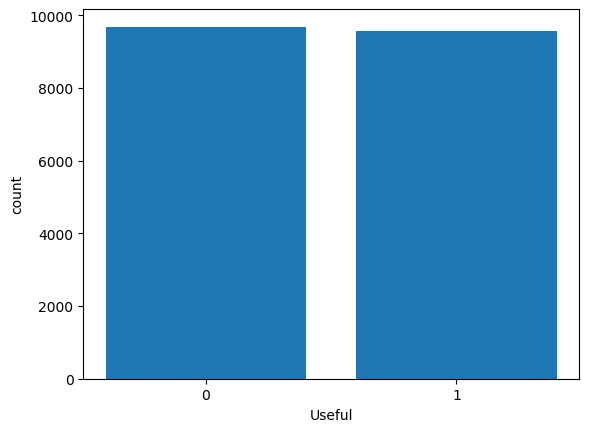

In [6]:
names = ['Useful', 'Not Useful']
values = [train['Useful'].value_counts()[0] , train['Useful'].value_counts()[1]]
plt.bar(names, values)
plt.show()

There is approximatively the same amount of 'useful' questions (score greater or equl to 1) than of 'not useful questions (score lower than 1). 

### (ii) Converting html texts 

In [265]:
# Below is the code to transform the title and body in HTML into text.

def transformation_html(name,train):
    liste = []
    for elements in train[name]:
        soup = BeautifulSoup(elements, 'html.parser')
        element = soup.get_text()
        element = element.replace('\n' , ' ')
        #we  remove the linebreak characters.
        liste.append(element)
    return(liste)




In [8]:
# Below is the code to transform the Tags in HTML into text.

import nltk
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def transformation_tags(name,train):
    liste = []
    for elements in train[name]:
        soup = BeautifulSoup(elements, 'html.parser')
        tags = [tag.name for tag in soup.find_all()]
        sentence = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tags]).strip()
        liste.append(sentence)
    return(liste)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emmascharfmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# below is the code to add the text column to the train set. 

train['Body_text'] = transformation_html('Body',train)
train['Title_text'] = transformation_html('Title',train)
train['Tags_text'] = transformation_tags('Tags',train)

train.head()

,Id,Score,Body,Title,Tags,Useful,Body_text,Title_text,Tags_text
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,1,I have a set of data that I am transforming us...,R: emmeans back tranform clr data using clrInv,r mixed-model linear lsmeans
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>,0,We are sending a one bit message to someone. ...,Trying to determine the failure rate of redund...,probability python
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,1,I am aware that there is a similar post: Vecto...,How to derive categorical cross entropy update...,logistic cross-entropy
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,1,I have a Poisson distributed glm where I have ...,"Learning more about glm parameters, how to dig...",generalized-linear-model interpretation
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,0,1) how do i decide which transformation or sca...,Is there I guide to decide which transformatio...,python data-transformation dataset feature-eng...


### (iii) Inspectation of the text and additional transformations.

In [266]:
# Below is the code to inspect the text. 
for i in range(5):
    print('Tags', i , train['Tags_text'][i])
    print('Title' , i , train['Title_text'][i] )
    print('Body' , i , train['Body_text'][i] )


Tags 0 r mixed-model linear lsmeans
Title 0 R: emmeans back tranform clr data using clrInv
Body 0 I have a set of data that I am transforming using the clr function library(compositions) clr(my_data)  Now I used lmer to build mixed effect linear models and I am extracting the estimated means and the contrasts using emmeans. I am aware of the options that can be used to back-transform the data e.g.   model.rg <- update(ref_grid(model), tran =  "asin.sqrt")   emm1<-emmeans(model.rg, specs = ~ drug:age:time, type = "response")  However, I cannot figure out how to back-transform the data CLR transformed. Any idea how could I achieve the back-transformation within emmeans? Thank you 
Tags 1 probability python
Title 1 Trying to determine the failure rate of redundantly sending bits over a noisy transmission
Body 1 We are sending a one bit message to someone.  There is a 60% chance the message bit will be a 0.  When transmitting the message there is a 3% chance a 1 will become a 0.  There is 

We should delete the Latex specific typo, for example, we should delete all '$' , '\ ' , '/' , '[]' and '{}'. We can also delete the arrows "-->" and "<--" and the "#" in the text. 

In [12]:
# Below is the code to do the additional transformations. 

def additional_transformations(name,train):
    text = transformation_html(name,train)
    for element in text:
        element = element.replace('$' , ' ')
        element = element.replace('[' , ' ')
        element = element.replace(']' , ' ')
        element = element.replace("\ " , ' ')
        element = element.replace('/' , ' ')
        element = element.replace('{' , ' ')
        element = element.replace('}' , ' ')
        element = element.replace('-->' , ' ')
        element = element.replace('<--' , ' ')
        element = element.replace('#' , ' ')
        #we  remove the linebreak characters.
        text.append(element)
    return(text)



In [13]:
# below is the code to modify the text column to the train set. 

#train['Body_text'] = additional_transformations('Body',train)
#train['Title_text'] = additional_transformations('Title',train)
#train['Tags_text'] = additional_transformations('Tags',train)

#train.head()

### (iv) Text cleaning 

In [14]:
### Below is the code to change to Lowercase

Body = train['Body_text']
Title = train['Title_text']
Tags = train['Tags_text']

Body_lowercase = Body.str.lower()
Body_lowercase

Title_lowercase = Title.str.lower()
Title_lowercase

Tags_lowercase = Tags.str.lower()
Tags_lowercase

0                             r mixed-model linear lsmeans
1                                       probability python
2                                   logistic cross-entropy
3                  generalized-linear-model interpretation
4        python data-transformation dataset feature-eng...
                               ...                        
19242                                  classification cart
19243    convergence asymptotics central-limit-theorem ...
19244              estimation maximum-likelihood censoring
19245    missing-data data-preprocessing indicator-func...
19246    r mixed-model repeated-measures nonparametric ...
Name: Tags_text, Length: 19247, dtype: object

In [15]:
### Below is the code to remove Punctuation

from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

Body_no_punct = Body_lowercase.apply(remove_punctuation)
Body_no_punct

Title_no_punct = Title_lowercase.apply(remove_punctuation)
Title_no_punct

Tags_no_punct = Tags_lowercase.apply(remove_punctuation)
Tags_no_punct

0                              r mixedmodel linear lsmeans
1                                       probability python
2                                    logistic crossentropy
3                    generalizedlinearmodel interpretation
4        python datatransformation dataset featureengin...
                               ...                        
19242                                  classification cart
19243    convergence asymptotics centrallimittheorem es...
19244               estimation maximumlikelihood censoring
19245      missingdata datapreprocessing indicatorfunction
19246    r mixedmodel repeatedmeasures nonparametric wi...
Name: Tags_text, Length: 19247, dtype: object

In [16]:
### Below is the code to remove Digits

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

Body_no_digit = Body_no_punct.apply(remove_digit)
Body_no_digit

Title_no_digit = Title_no_punct.apply(remove_digit)
Title_no_digit

Tags_no_digit = Tags_no_punct.apply(remove_digit)
Tags_no_digit

0                              r mixedmodel linear lsmeans
1                                       probability python
2                                    logistic crossentropy
3                    generalizedlinearmodel interpretation
4        python datatransformation dataset featureengin...
                               ...                        
19242                                  classification cart
19243    convergence asymptotics centrallimittheorem es...
19244               estimation maximumlikelihood censoring
19245      missingdata datapreprocessing indicatorfunction
19246    r mixedmodel repeatedmeasures nonparametric wi...
Name: Tags_text, Length: 19247, dtype: object

In order to do certain word-related manipulations, we will first tokenize the text, i.e. transform the complete text string into a vector of words

In [17]:
# below is the code to tokenize the data.

import nltk
from nltk.tokenize import word_tokenize

Body_tokenized = Body_no_digit.apply(word_tokenize)
Body_tokenized.head()

Title_tokenized = Title_no_digit.apply(word_tokenize)
Title_tokenized.head()

Tags_tokenized = Tags_no_digit.apply(word_tokenize)
Tags_tokenized.head()

0                     [r, mixedmodel, linear, lsmeans]
1                                [probability, python]
2                             [logistic, crossentropy]
3             [generalizedlinearmodel, interpretation]
4    [python, datatransformation, dataset, featuree...
Name: Tags_text, dtype: object

In [267]:
#below is the code to remove stop words. 
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmascharfmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Together with the stopwords, we want to remove also the word "question"
# as this is a word that might be common to all of our tweets 

stop_words.add('question')

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

Body_no_stop = Body_tokenized.apply(remove_stopwords)
Body_no_stop

Title_no_stop = Title_tokenized.apply(remove_stopwords)
Title_no_stop

Tags_no_stop = Tags_tokenized.apply(remove_stopwords)
Tags_no_stop

0                         [r, mixedmodel, linear, lsmeans]
1                                    [probability, python]
2                                 [logistic, crossentropy]
3                 [generalizedlinearmodel, interpretation]
4        [python, datatransformation, dataset, featuree...
                               ...                        
19242                               [classification, cart]
19243    [convergence, asymptotics, centrallimittheorem...
19244           [estimation, maximumlikelihood, censoring]
19245    [missingdata, datapreprocessing, indicatorfunc...
19246    [r, mixedmodel, repeatedmeasures, nonparametri...
Name: Tags_text, Length: 19247, dtype: object

In [20]:
# below is the code to stemm the text

from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

Body_stemmed = Body_no_stop.apply(stemmer)
Body_stemmed

Title_stemmed = Title_no_stop.apply(stemmer)
Title_stemmed

Tags_stemmed = Tags_no_stop.apply(stemmer)
Tags_stemmed


0                          [r, mixedmodel, linear, lsmean]
1                                        [probabl, python]
2                                   [logist, crossentropi]
3                      [generalizedlinearmodel, interpret]
4        [python, datatransform, dataset, featureengin,...
                               ...                        
19242                                      [classif, cart]
19243    [converg, asymptot, centrallimittheorem, estim...
19244                   [estim, maximumlikelihood, censor]
19245        [missingdata, datapreprocess, indicatorfunct]
19246    [r, mixedmodel, repeatedmeasur, nonparametr, w...
Name: Tags_text, Length: 19247, dtype: object

In [21]:
# Below is the code to generate document term matrices as we did in Lab for the body text

from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer


Body_detokenized = Body_stemmed.apply(TreebankWordDetokenizer().detokenize)

countvec = CountVectorizer(min_df=0.005)

sparse_dtm_Body = countvec.fit_transform(Body_detokenized)
sparse_dtm_Body

dtm_Body = pd.DataFrame(sparse_dtm_Body.toarray(), columns=countvec.get_feature_names(), index=train.index)
dtm_Body


/Users/emmascharfmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abil,abl,absolut,accept,access,accord,account,accur,accuraci,...,xy,ye,year,yet,yi,yield,yn,yt,ytrain,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19244,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [22]:
# Below is the code to generate document term matrices as we did in Lab for the Title text


Title_detokenized = Title_stemmed.apply(TreebankWordDetokenizer().detokenize)

countvec = CountVectorizer(min_df=0.005)

sparse_dtm_Title = countvec.fit_transform(Title_detokenized)
sparse_dtm_Title

dtm_Title = pd.DataFrame(sparse_dtm_Title.toarray(), columns=countvec.get_feature_names(), index=train.index)
dtm_Title

/Users/emmascharfmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accuraci,adjust,algorithm,analysi,anova,appli,approach,appropri,arima,assumpt,...,varianc,variat,vector,vs,way,weight,without,work,would,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Below is the code to generate document term matrices as we did in Lab for the Tags text


Tags_detokenized = Tags_stemmed.apply(TreebankWordDetokenizer().detokenize)

countvec = CountVectorizer(min_df=0.005)

sparse_dtm_Tags = countvec.fit_transform(Tags_detokenized)
sparse_dtm_Tags

dtm_Tags = pd.DataFrame(sparse_dtm_Tags.toarray(), columns=countvec.get_feature_names(), index=train.index)
dtm_Tags

/Users/emmascharfmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aic,anova,arima,autocorrel,bayesian,bia,binomialdistribut,biostatist,boost,bootstrap,...,statisticalsignific,stochasticprocess,surviv,svm,tensorflow,terminolog,timeseri,ttest,unbalancedclass,varianc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### (v) Use of different column names

In [24]:
# Below is the code to change the name of the features of each table. 

def change_name_columns(detokenized , name):
    countvec = CountVectorizer(min_df=0.005)
    sparse_dtm = countvec.fit_transform(detokenized)
    columns = []
    for element in countvec.get_feature_names():
        columns.append(element + '_' + name)
    return columns

dtm_Tags = pd.DataFrame(sparse_dtm_Tags.toarray(), columns=change_name_columns(Tags_detokenized , 'Tags'), index=train.index)


dtm_Title = pd.DataFrame(sparse_dtm_Title.toarray(), columns=change_name_columns(Title_detokenized , 'Title'), index=train.index)

dtm_Body = pd.DataFrame(sparse_dtm_Body.toarray(), columns=change_name_columns(Body_detokenized , 'Body'), index=train.index)
dtm_Body



/Users/emmascharfmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab_Body,abil_Body,abl_Body,absolut_Body,accept_Body,access_Body,accord_Body,account_Body,accur_Body,accuraci_Body,...,xy_Body,ye_Body,year_Body,yet_Body,yi_Body,yield_Body,yn_Body,yt_Body,ytrain_Body,zero_Body
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,2,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19244,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [25]:
# Below is the code to change the merge the tree tables.


dtm = pd.concat([dtm_Tags, dtm_Title , dtm_Body], axis=1)
dtm

,aic_Tags,anova_Tags,arima_Tags,autocorrel_Tags,bayesian_Tags,bia_Tags,binomialdistribut_Tags,biostatist_Tags,boost_Tags,bootstrap_Tags,...,xy_Body,ye_Body,year_Body,yet_Body,yi_Body,yield_Body,yn_Body,yt_Body,ytrain_Body,zero_Body
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


### Analysis of the most frequent words that appear

In [26]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

model_Body              22386
use_Body                20997
data_Body               19024
variabl_Body            13668
would_Body              11586
                        ...  
implement_Title            98
creat_Title                98
better_Title               98
featureengin_Tags          97
gaussianprocess_Tags       97
Length: 1745, dtype: int64


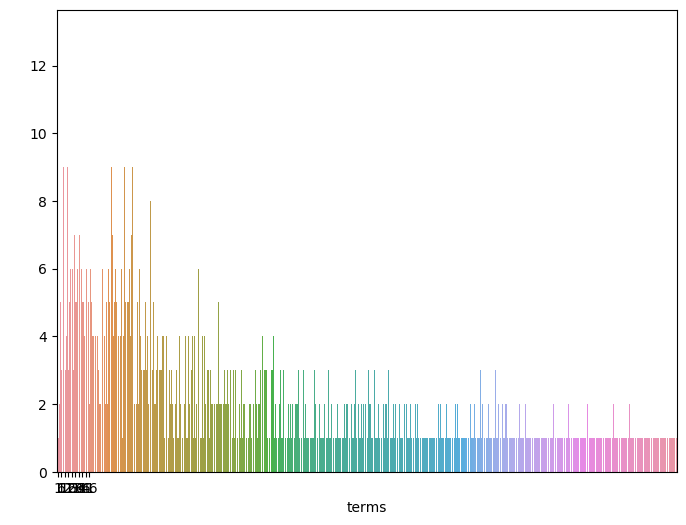

In [27]:
plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 50, step=5), np.arange(1, 50, step=5))

# freq = pd.DataFrame(frequencies, columns=['Frequencies']).transpose()
# ax = sns.countplot(freq)
# ax = sns.distplot(frequencies, bins=len(frequencies))
# ax = plt.hist(frequencies[frequencies > 50])

plt.xlabel('terms')
plt.ylabel(' ')
plt.show()

## Question (b)

### import and clean the test data

In [28]:
#below is the code to import the test data

name_test = 'stack_stats_2020_test.csv'
test = pd.read_csv(name_test)


# below is the code to add the column "useful" that indicate us if the question is useful or not.

test['Useful'] = (test['Score'] >= 1).astype('int32').astype('object')
test.head()


# below is the code to add the text column to the test set. 

test['Body_text'] = transformation_html('Body',test)
test['Title_text'] = transformation_html('Title',test)
test['Tags_text'] = transformation_tags('Tags',test)

# below is the code to modify the text column to the test set. 

#test['Body_text'] = additional_transformations('Body',test)
#test['Title_text'] = additional_transformations('Title',test)
#test['Tags_text'] = additional_transformations('Tags',test)

test.head()

,Id,Score,Body,Title,Tags,Useful,Body_text,Title_text,Tags_text
0,476132,0,<p><strong>Summarize the problem</strong></p>\...,What I do with the results extracted from lasso?,<stata><lasso>,0,Summarize the problem I have a dataset with pa...,What I do with the results extracted from lasso?,stata lasso
1,450811,0,<p>I try to calculate the marginal likelihood ...,the marginal likelihood of analytical result i...,<sampling><marginal-distribution><rstan>,0,I try to calculate the marginal likelihood of ...,the marginal likelihood of analytical result i...,sampling marginal-distribution rstan
2,472876,1,<p>I have a data set which involves 30 binomia...,GLMER Overdispersion and Error messages,<lme4-nlme><glmm><eigenvalues><overdispersion>,1,I have a data set which involves 30 binomial a...,GLMER Overdispersion and Error messages,lme4-nlme glmm eigenvalues overdispersion
3,470799,1,<p>It is well known that the K-means algorithm...,K-medoids: Is there any constraint about the c...,<clustering><k-medoids>,1,It is well known that the K-means algorithm is...,K-medoids: Is there any constraint about the c...,clustering k-medoids
4,446472,2,<p>I'm working on a text classification proble...,Combining XGBoost and LightGBM,<python><boosting>,1,I'm working on a text classification problem a...,Combining XGBoost and LightGBM,python boosting


In [62]:
### Below is the code to change to Lowercase

Body_test = test['Body_text']
Title_test = test['Title_text']
Tags_test = test['Tags_text']

Body_lowercase_test = Body_test.str.lower()
Body_lowercase_test

Title_lowercase_test = Title_test.str.lower()
Title_lowercase_test

Tags_lowercase_test = Tags_test.str.lower()
Tags_lowercase_test

### Below is the code to remove Punctuation

Body_no_punct_test = Body_lowercase_test.apply(remove_punctuation)
Body_no_punct_test

Title_no_punct_test = Title_lowercase_test.apply(remove_punctuation)
Title_no_punct_test

Tags_no_punct_test = Tags_lowercase_test.apply(remove_punctuation)
Tags_no_punct_test

### Below is the code to remove Digits

Body_no_digit_test = Body_no_punct_test.apply(remove_digit)
Body_no_digit_test

Title_no_digit_test = Title_no_punct_test.apply(remove_digit)
Title_no_digit_test

Tags_no_digit_test = Tags_no_punct_test.apply(remove_digit)
Tags_no_digit_test

# below is the code to tokenize the data.

Body_tokenized_test = Body_no_digit_test.apply(word_tokenize)
Body_tokenized_test.head()

Title_tokenized_test = Title_no_digit_test.apply(word_tokenize)
Title_tokenized_test.head()

Tags_tokenized_test = Tags_no_digit_test.apply(word_tokenize)
Tags_tokenized_test.head()

#below is the code to remove stop words. 

Body_no_stop_test = Body_tokenized_test.apply(remove_stopwords)
Body_no_stop_test

Title_no_stop_test = Title_tokenized_test.apply(remove_stopwords)
Title_no_stop_test

Tags_no_stop_test = Tags_tokenized_test.apply(remove_stopwords)
Tags_no_stop_test

# below is the code to stemm the text

Body_stemmed_test = Body_no_stop_test.apply(stemmer)
Body_stemmed_test

Title_stemmed_test = Title_no_stop_test.apply(stemmer)
Title_stemmed_test

Tags_stemmed_test = Tags_no_stop_test.apply(stemmer)
Tags_stemmed_test



0                                          [stata, lasso]
1                       [sampl, marginaldistribut, rstan]
2                  [lmenlm, glmm, eigenvalu, overdispers]
3                                      [cluster, kmedoid]
4                                         [python, boost]
                              ...                        
8244                                [r, datavisu, ggplot]
8245    [regress, anova, generalizedlinearmodel, model...
8246    [r, regress, logist, missingdata, regressionst...
8247                              [r, mixedmodel, lmenlm]
8248    [machinelearn, randomforest, spatial, partit, ...
Name: Tags_text, Length: 8249, dtype: object

In [111]:
Body_detokenized_test = Body_stemmed_test.apply(TreebankWordDetokenizer().detokenize)
countvec = CountVectorizer(min_df=0.005)
sparse_dtm_Body_test = countvec.fit_transform(Body_detokenized_test)
dtm_Body_test = pd.DataFrame(sparse_dtm_Body_test.toarray(), columns=change_name_columns(Body_detokenized_test , 'Body'), index=test.index)


/Users/emmascharfmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
Title_detokenized_test = Title_stemmed_test.apply(TreebankWordDetokenizer().detokenize)
countvec = CountVectorizer(min_df=0.005)
sparse_dtm_Title_test = countvec.fit_transform(Title_detokenized_test)
dtm_Title_test = pd.DataFrame(sparse_dtm_Title_test.toarray(), columns=change_name_columns(Title_detokenized_test , 'Title'), index=test.index)


In [113]:
Tags_detokenized_test = Tags_stemmed_test.apply(TreebankWordDetokenizer().detokenize)
countvec = CountVectorizer(min_df=0.005)
sparse_dtm_Tags_test = countvec.fit_transform(Tags_detokenized_test)
dtm_Tags_test = pd.DataFrame(sparse_dtm_Tags_test.toarray(), columns=change_name_columns(Tags_detokenized_test , 'Tags'), index=test.index)

dtm_Tags = pd.DataFrame(sparse_dtm_Tags.toarray(), columns=change_name_columns(Tags_detokenized , 'Tags'), index=train.index)


In [114]:
# Below is the code to change the merge the tree tables.

dtm_test = pd.concat([dtm_Tags_test, dtm_Title_test , dtm_Body_test], axis=1)
dtm_test

,aic_Tags,anova_Tags,arima_Tags,asymptot_Tags,autocorrel_Tags,autoencod_Tags,bayesian_Tags,bia_Tags,binarydata_Tags,binomialdistribut_Tags,...,xt_Body,xx_Body,xy_Body,ye_Body,year_Body,yet_Body,yi_Body,yield_Body,yt_Body,zero_Body
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8245,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# below is the code to add the column "useful" that indicate us if the question is useful or not.

test['Useful'] = (test['Score'] >= 1).astype('int32').astype('object')
test.head()

,Id,Score,Body,Title,Tags,Useful,Body_text,Title_text,Tags_text
0,476132,0,<p><strong>Summarize the problem</strong></p>\...,What I do with the results extracted from lasso?,<stata><lasso>,0,Summarize the problem I have a dataset with pa...,What I do with the results extracted from lasso?,stata lasso
1,450811,0,<p>I try to calculate the marginal likelihood ...,the marginal likelihood of analytical result i...,<sampling><marginal-distribution><rstan>,0,I try to calculate the marginal likelihood of ...,the marginal likelihood of analytical result i...,sampling marginal-distribution rstan
2,472876,1,<p>I have a data set which involves 30 binomia...,GLMER Overdispersion and Error messages,<lme4-nlme><glmm><eigenvalues><overdispersion>,1,I have a data set which involves 30 binomial a...,GLMER Overdispersion and Error messages,lme4-nlme glmm eigenvalues overdispersion
3,470799,1,<p>It is well known that the K-means algorithm...,K-medoids: Is there any constraint about the c...,<clustering><k-medoids>,1,It is well known that the K-means algorithm is...,K-medoids: Is there any constraint about the c...,clustering k-medoids
4,446472,2,<p>I'm working on a text classification proble...,Combining XGBoost and LightGBM,<python><boosting>,1,I'm working on a text classification problem a...,Combining XGBoost and LightGBM,python boosting


In [145]:
# below is the code to compute the baseline model

y_train = train['Useful']
y_train=y_train.astype('int')
X_train = dtm

y_test = test['Useful']
y_test=y_test.astype('int')
X_test_old = dtm_test

def change_test_columns(X_test):
    for element in X_test.columns:
        if element not in X_train.columns:
            X_test = X_test.drop([element],axis=1)
    return X_test

def change_train_columns(X_train):
    for element in X_train.columns:
        if element not in X_test.columns:
            X_train = X_train.drop([element],axis=1)
    return X_train

X_train = change_train_columns(X_train)
X_test = change_test_columns(X_test_old)


print(y_train.value_counts())
print(y_test.value_counts())

# Baseline accuracy

print('ACC_baseline = ', max(y_test.value_counts()[0] , y_test.value_counts()[1]) / (y_test.value_counts()[0] + y_test.value_counts()[1]) ) 

0    9684
1    9563
Name: Useful, dtype: int64
0    4226
1    4023
Name: Useful, dtype: int64
ACC_baseline =  0.5123045217602133


The baseline model has an accuracy equal to 0.51. The baseline model associates 1 to all the comments, or 0 to all the comments. 

### CART decision tree to predict useful questions.

In [167]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.001,
                             criterion = 'gini',
                             random_state = 88)

dtc = dtc.fit(X_train, y_train)

In [168]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_cart = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_cart))

Confusion Matrix: 
 [[3192 1034]
 [2657 1366]]

Accuracy: 0.5525518244635713


### Random Forest Classifier to predict useful questions

In [149]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix: 
 [[3192 1034]
 [2657 1366]]

Accuracy: 0.5935264880591586


### Logistic Regression to predict useful questions


In [146]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=88)

In [170]:
y_prob_log = logreg.predict_proba(X_test)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_log))

Confusion Matrix: 
 [[3192 1034]
 [2657 1366]]

Accuracy: 0.5632197842162686


### Linear gradient analysis to predict useful questions


In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [171]:
y_pred_lda = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[3192 1034]
 [2657 1366]]

Accuracy: 0.5634622378470118


In [174]:
# below is the code to compare the accuracy of the baseline, CART, bagging, Random Forest, and boosting models from part (b).

comparison_data = {'Baseline model': ['{:.3f}'.format(max(y_test.value_counts()[0] , y_test.value_counts()[1]) / (y_test.value_counts()[0] + y_test.value_counts()[1]))]  ,                  
                   'CART model ': ['{:.3f}'.format(accuracy_score(y_test, y_pred_cart))]        ,  
                   'Random forest' : ['{:.3f}'.format(accuracy_score(y_test, y_pred_rf))]  ,
                   'Logistic model': ['{:.3f}'.format(accuracy_score(y_test, y_pred_log))] ,
                   'Linear Discriminant Analysis': ['{:.3f}'.format(accuracy_score(y_test, y_pred_lda))] }

comparison_table = pd.DataFrame(data=comparison_data, index=['accuracy'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Baseline model,CART model,Random forest,Logistic model,Linear Discriminant Analysis
accuracy,0.512,0.553,0.594,0.563,0.563


The random forest model has the best accuracy, which is for me the most important parameter in the problem. Moreover, the random forest model doesn't take too much time to run. I will select this model. 

In [260]:
# below is the code to use bootstrap on random forest model. 

def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

bs_output = bootstrap_validation(X_test,y_test,y_train,rf,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 200)



(200, 3)


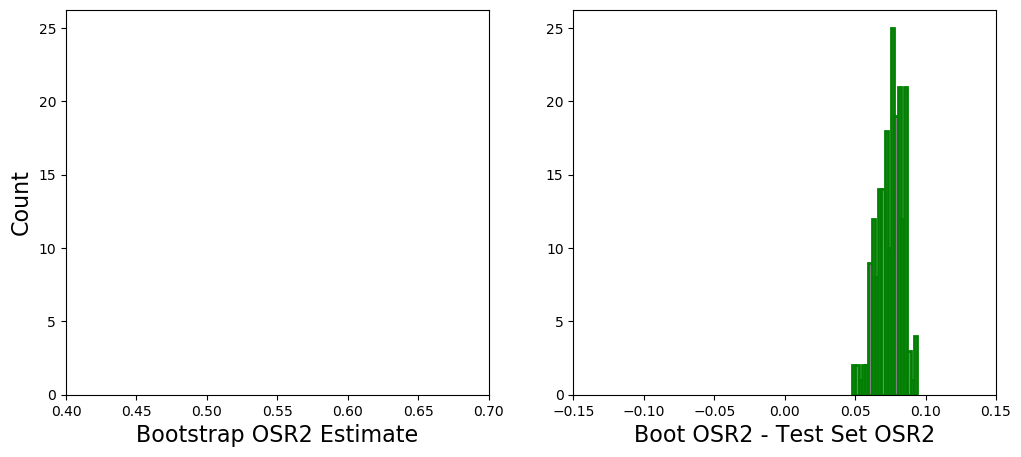

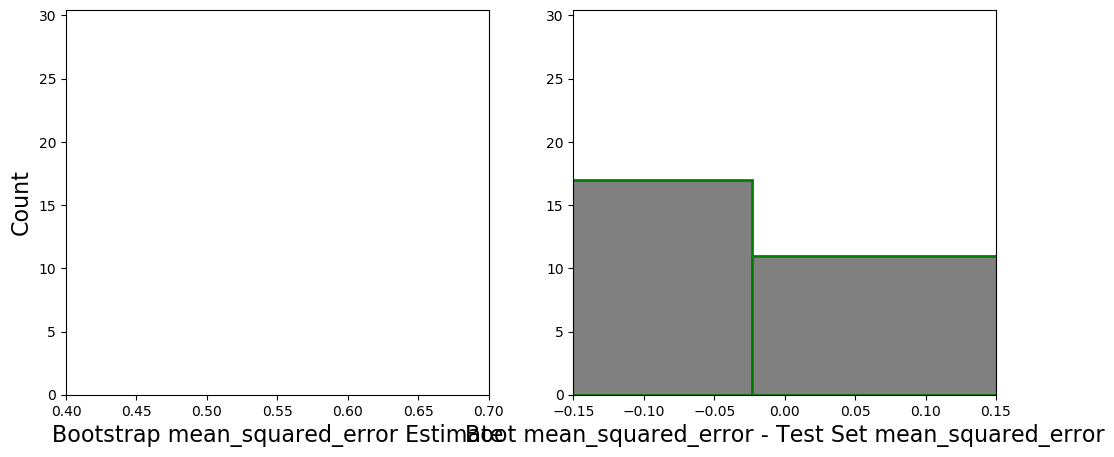

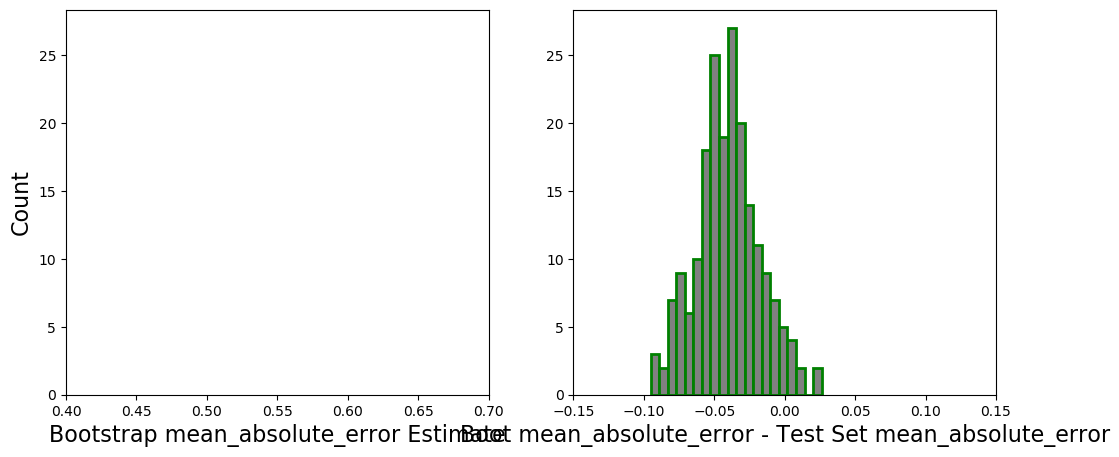

The 95-percent confidence interval of the boosting model are [0.05488851 0.08877194] [-1.87483634  1.75325191] [-0.0827767   0.00776155]


In [264]:
test_OSR2 = OS_R_squared(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,0]-test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

test_MSE = mean_squared_error(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap mean_squared_error Estimate', fontsize=16)
axs[1].set_xlabel('Boot mean_squared_error - Test Set mean_squared_error', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,1]-test_MSE, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

test_MAE = mean_absolute_error(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap mean_absolute_error Estimate', fontsize=16)
axs[1].set_xlabel('Boot mean_absolute_error - Test Set mean_absolute_error', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,2], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,2]-test_MAE, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])
plt.show()

# The 95% confidence interval of the boosting model. 
CI_boost_OSR2= np.quantile(bs_output.iloc[:,0]-test_OSR2,np.array([0.025,0.975]))
CI_boost_MSE= np.quantile(bs_output.iloc[:,1]-test_MSE,np.array([0.025,0.975]))
CI_boost_MAE= np.quantile(bs_output.iloc[:,2]-test_MAE,np.array([0.025,0.975]))

print("The 95-percent confidence interval of the boosting model are %s" % CI_boost_OSR2, CI_boost_MSE ,CI_boost_MAE )

## question c)

### question (i)

First, the only important feature here is the first comment that appear. So, what is important for us is the true positive rate of the most important comment. We don't care about the false negative rate. So we can only look at the true positive rate. 

Then, I would revisite the models not to have only classification models (not to have "useful" and "not useful") and I would keep the initial scores of the comments. Then, I will put first the comment with the maximum score. 

### question (ii)

I will train a linear regression model that predict the score of each comments. Then, I will take 15 random comments and predict their score. Then, I will select the comment with the higher score. This comment will be the one that will appear first in the page. 

To calculate the TPR of the model, I will run the model 1000 times, and I will fill in a matrix with one if the k-th time I run the algorithm, the predict value is higher that 1 AND the test value is also higher than one. 
The TPR is then the proportion of 1 in the matrix

In [240]:
y_train = train['Score']
y_train=y_train.astype('int')

y_test = test['Score']
y_test_binaire = test['Useful']

y_test=y_test.astype('int')
y_test_binaire=y_test_binaire.astype('int')
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [256]:
import random 

def best_comment(X_test):
    y_prob_lin = linreg.predict(X_test)
    matrix = np.zeros(1000)
    for k in range(1000):
        n = len(y_prob_lin)
        list = np.arange(0,n)
        index = np.random.randint(0, n, size=15)
        y_max = np.max(y_prob_lin[index])
        i_max = np.argmax([y_prob_lin[index]])
        j_max = index[i_max]
        if y_max > 1:
            y_pred = 1
        else : 
            y_pred = 0

        matrix[k] =  y_test_binaire[j_max] * y_pred
    return(matrix)

matrix = best_comment(X_test)

TPR = np.sum(matrix)
        
print("TPR=",TPR/1000)




TPR= 0.621


The TPR of this model is equal to 62%. That the best we have from there. 